In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.formula.api as sm 
import statistics as stat
from scipy import stats
import seaborn as sns
import math

In [2]:
# set the DPI value (a larger DPI value makes a larger figure)
# for example: setting to 100 to make the IPYNB/HTML file easier to read
# for example: setting to 600 to produce higher-quality figures
FIGURE_SIZE_LEVEL = 1
plt.rcParams['figure.dpi'] = FIGURE_SIZE_LEVEL * 100

plt.rcParams['figure.autolayout'] = True

plt.rcParams['font.size'] = 16        # font size for text
plt.rcParams['axes.titlesize'] = 16   # font size for titles
plt.rcParams['axes.labelsize'] = 16   # font size for x and y labels
plt.rcParams['xtick.labelsize'] = 16  # font size for x tick labels
plt.rcParams['ytick.labelsize'] = 16  # font size for y tick labels

In [3]:
df = pd.read_csv("movie_summary.csv")

### Category and Revenue 

#### Box plot by category

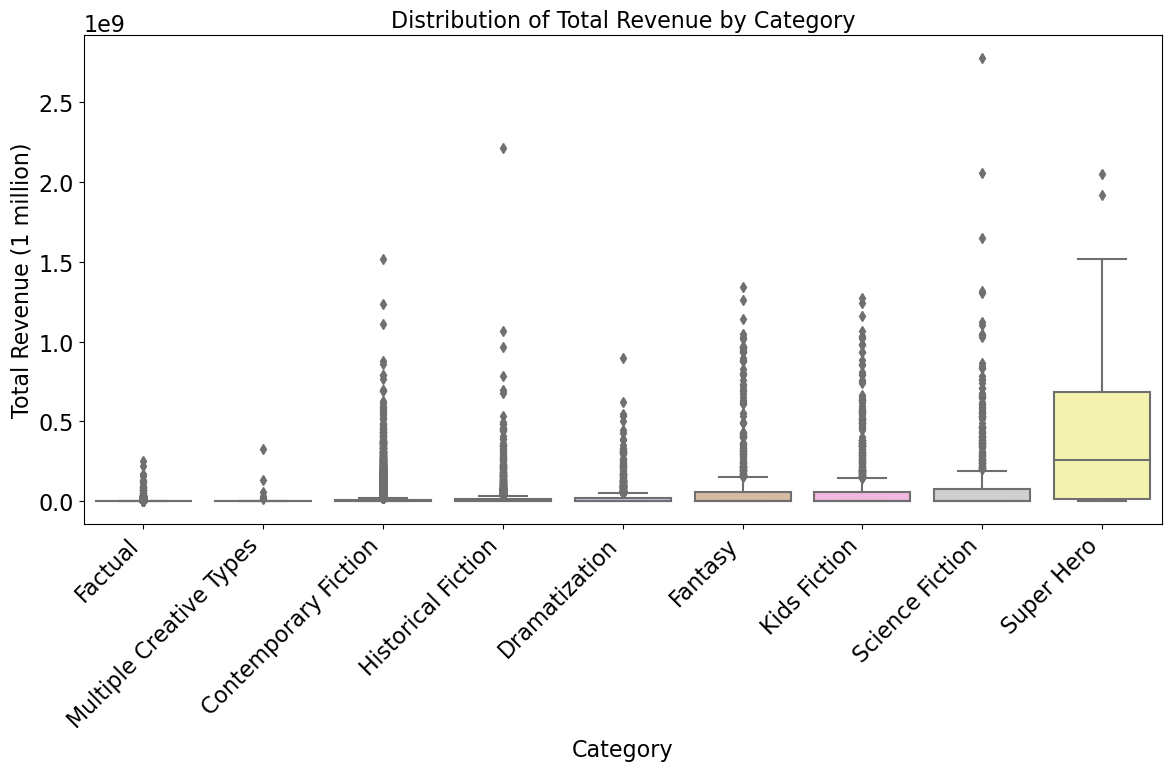

                           count          mean           std     min  \
creative_type                                                          
Contemporary Fiction     10259.0  1.945761e+07  6.125230e+07     0.0   
Dramatization             1062.0  2.797663e+07  7.130668e+07     0.0   
Factual                   2981.0  1.711662e+06  1.080077e+07     0.0   
Fantasy                    934.0  7.487363e+07  1.804001e+08     0.0   
Historical Fiction        1634.0  2.754292e+07  9.471710e+07     0.0   
Kids Fiction               885.0  8.211520e+07  1.844854e+08     0.0   
Multiple Creative Types     46.0  1.364848e+07  5.168899e+07  2772.0   
Science Fiction            760.0  9.733314e+07  2.302871e+08     0.0   
Super Hero                 112.0  4.091860e+08  4.385055e+08     0.0   

                                 25%          50%           75%           max  
creative_type                                                                  
Contemporary Fiction        32981.50     607170

In [4]:
df['total_box_office'] = df['domestic_box_office'] + df['international_box_office']

# Box plot of total revenue by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='creative_type', y='total_box_office', data=df, palette='pastel', order=df.groupby('creative_type')['total_box_office'].mean().sort_values().index)
plt.title('Distribution of Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (1 million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show descriptive statistics for total revenue by category
desc_stats = df.groupby('creative_type')['total_box_office'].describe()
print(desc_stats)

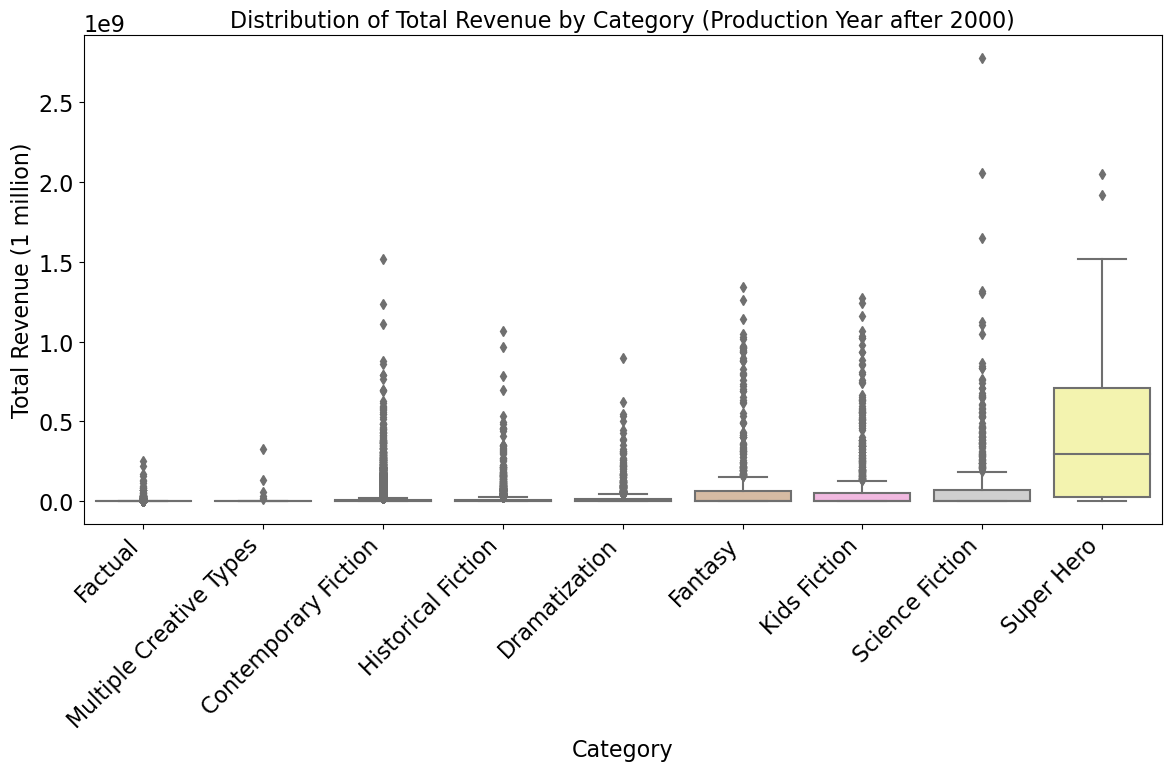

                          count          mean           std     min  \
creative_type                                                         
Contemporary Fiction     9565.0  1.840769e+07  6.013137e+07     0.0   
Dramatization             982.0  2.704829e+07  7.101126e+07     0.0   
Factual                  2908.0  1.602789e+06  1.048478e+07     0.0   
Fantasy                   857.0  7.544305e+07  1.840039e+08     0.0   
Historical Fiction       1453.0  2.428721e+07  7.450994e+07     0.0   
Kids Fiction              841.0  8.050621e+07  1.832622e+08     0.0   
Multiple Creative Types    46.0  1.364848e+07  5.168899e+07  2772.0   
Science Fiction           672.0  9.365631e+07  2.308485e+08     0.0   
Super Hero                107.0  4.245245e+08  4.423094e+08     0.0   

                                 25%          50%           75%           max  
creative_type                                                                  
Contemporary Fiction        31100.00     536012.0  7.48238

In [5]:
# Filter data for movies produced in or after 2000
df_2000 = df[df['production_year'] >= 2000].copy()

# Make sure total_box_office column exists
df_2000['total_box_office'] = df_2000['domestic_box_office'] + df_2000['international_box_office']

# Box plot of total revenue by category (for movies >= 2000)
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='creative_type',
    y='total_box_office',
    data=df_2000,
    palette='pastel',
    order=df_2000.groupby('creative_type')['total_box_office'].mean().sort_values().index
)
plt.title('Distribution of Total Revenue by Category (Production Year after 2000)')
plt.xlabel('Category')
plt.ylabel('Total Revenue (1 million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show descriptive statistics for total revenue by category (for movies >= 2000)
desc_stats = df_2000.groupby('creative_type')['total_box_office'].describe()
print(desc_stats)

#### bar chart of box offices by category

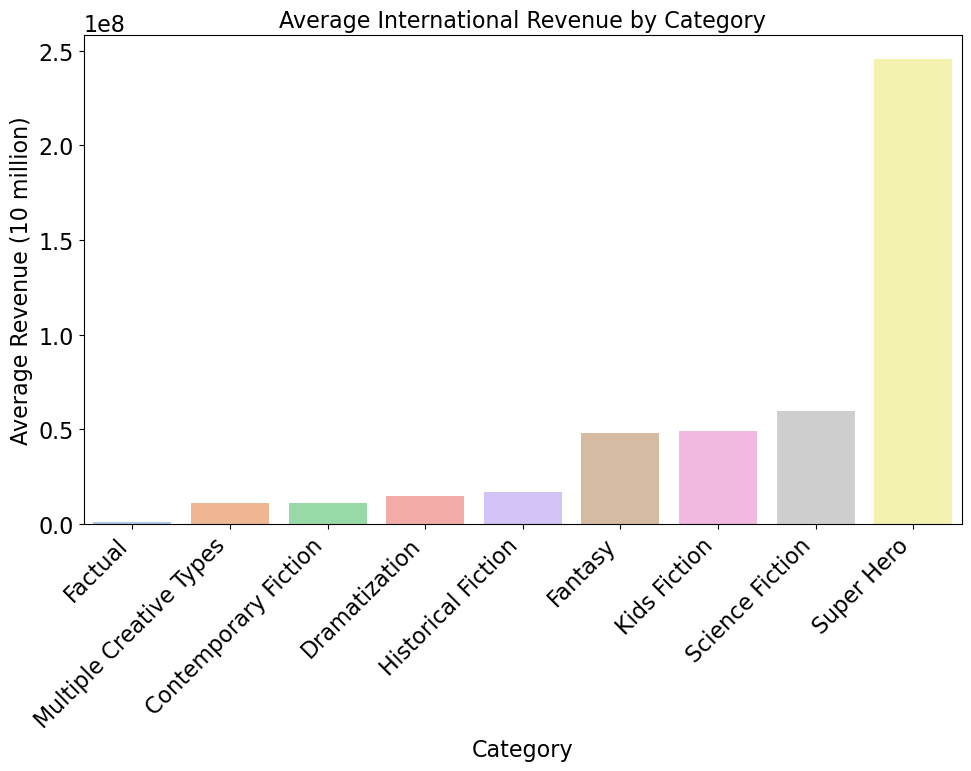

In [6]:
revenue_by_category = df.groupby('creative_type')['international_box_office'].mean().reset_index()
revenue_by_category = revenue_by_category.sort_values('international_box_office')

plt.figure(figsize=(10, 8))
sns.barplot(x='creative_type', y='international_box_office', data=revenue_by_category, palette='pastel')
plt.title('Average International Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

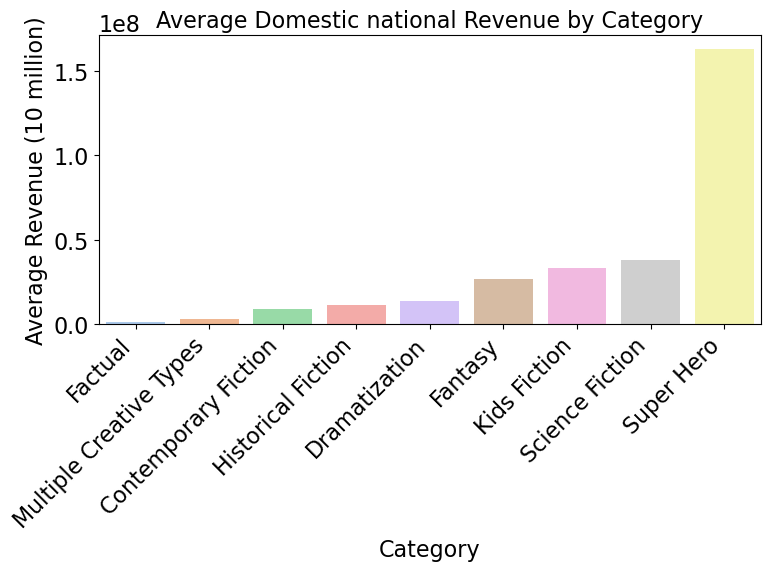

In [7]:
revenue_by_category = df.groupby('creative_type')['domestic_box_office'].mean().reset_index()
revenue_by_category = revenue_by_category.sort_values('domestic_box_office')

plt.figure(figsize=(8, 6))
sns.barplot(x='creative_type', y='domestic_box_office', data=revenue_by_category, palette='pastel')
plt.title('Average Domestic national Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

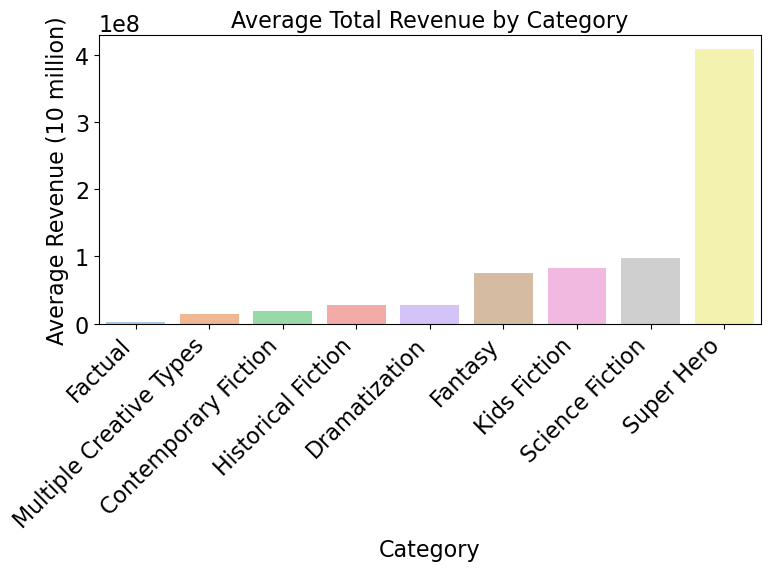

In [8]:
df['total_box_office'] = df['domestic_box_office'] + df['international_box_office']
revenue_by_category = df.groupby('creative_type')['total_box_office'].mean().reset_index()
revenue_by_category = revenue_by_category.sort_values('total_box_office')

plt.figure(figsize=(8, 6))
sns.barplot(x='creative_type', y='total_box_office', data=revenue_by_category, palette='pastel')
plt.title('Average Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

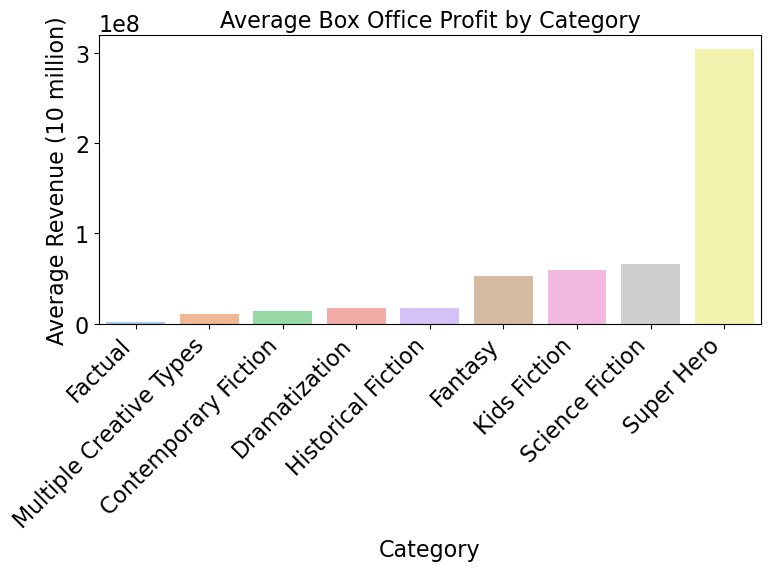

In [9]:
df['box_office_profit'] = df['domestic_box_office'] + df['international_box_office'] - df['production_budget']
revenue_by_category = df.groupby('creative_type')['box_office_profit'].mean().reset_index()
revenue_by_category = revenue_by_category.sort_values('box_office_profit')

plt.figure(figsize=(8, 6))
sns.barplot(x='creative_type', y='box_office_profit', data=revenue_by_category, palette='pastel')
plt.title('Average Box Office Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

#### Ratio of Domesic and International Box Office

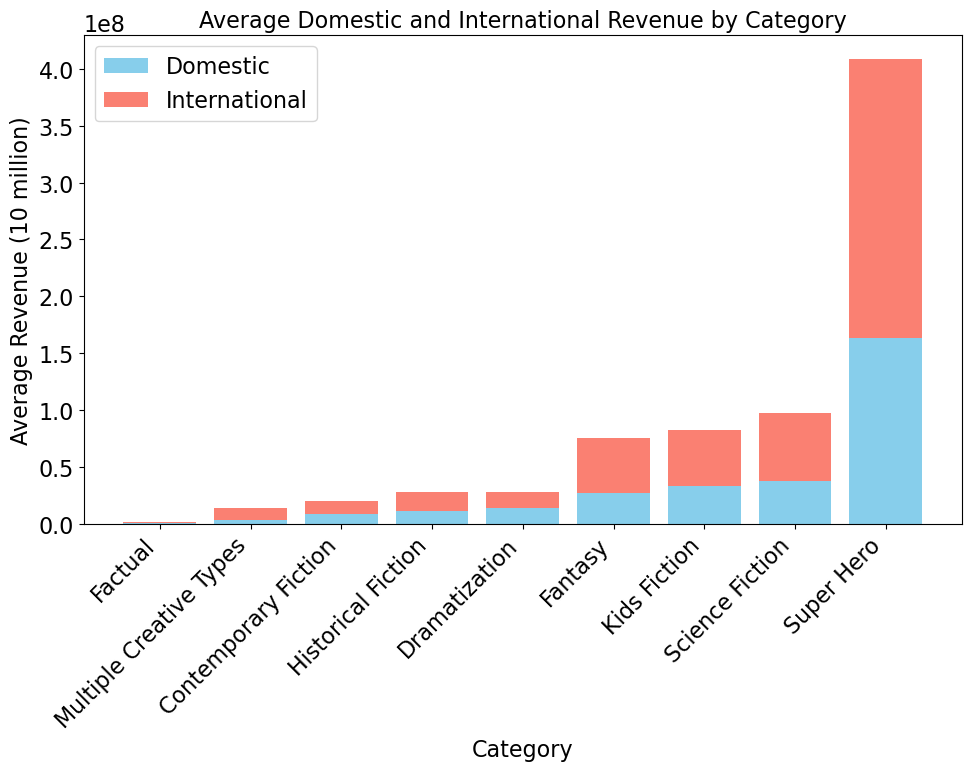

             creative_type  intl_to_dom_ratio
2                  Factual           0.827473
6  Multiple Creative Types           3.918627
0     Contemporary Fiction           1.283778
4       Historical Fiction           1.546847
1            Dramatization           1.071064
3                  Fantasy           1.799334
5             Kids Fiction           1.487146
7          Science Fiction           1.588120
8               Super Hero           1.506346


In [10]:
# Group by category and calculate mean for both domestic and international box office
revenue_by_category = df.groupby('creative_type')[['domestic_box_office', 'international_box_office']].mean().reset_index()

# Calculate the international-to-domestic ratio
revenue_by_category['intl_to_dom_ratio'] = revenue_by_category['international_box_office'] / revenue_by_category['domestic_box_office']

# Sort by total box office
revenue_by_category['total'] = revenue_by_category['domestic_box_office'] + revenue_by_category['international_box_office']
revenue_by_category = revenue_by_category.sort_values('total')

# Plot stacked bar
plt.figure(figsize=(10, 8))
plt.bar(revenue_by_category['creative_type'], revenue_by_category['domestic_box_office'], label='Domestic', color='skyblue')
plt.bar(revenue_by_category['creative_type'], revenue_by_category['international_box_office'],
        bottom=revenue_by_category['domestic_box_office'], label='International', color='salmon')

plt.title('Average Domestic and International Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue (10 million)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Show the international-to-domestic ratio
print(revenue_by_category[['creative_type', 'intl_to_dom_ratio']])

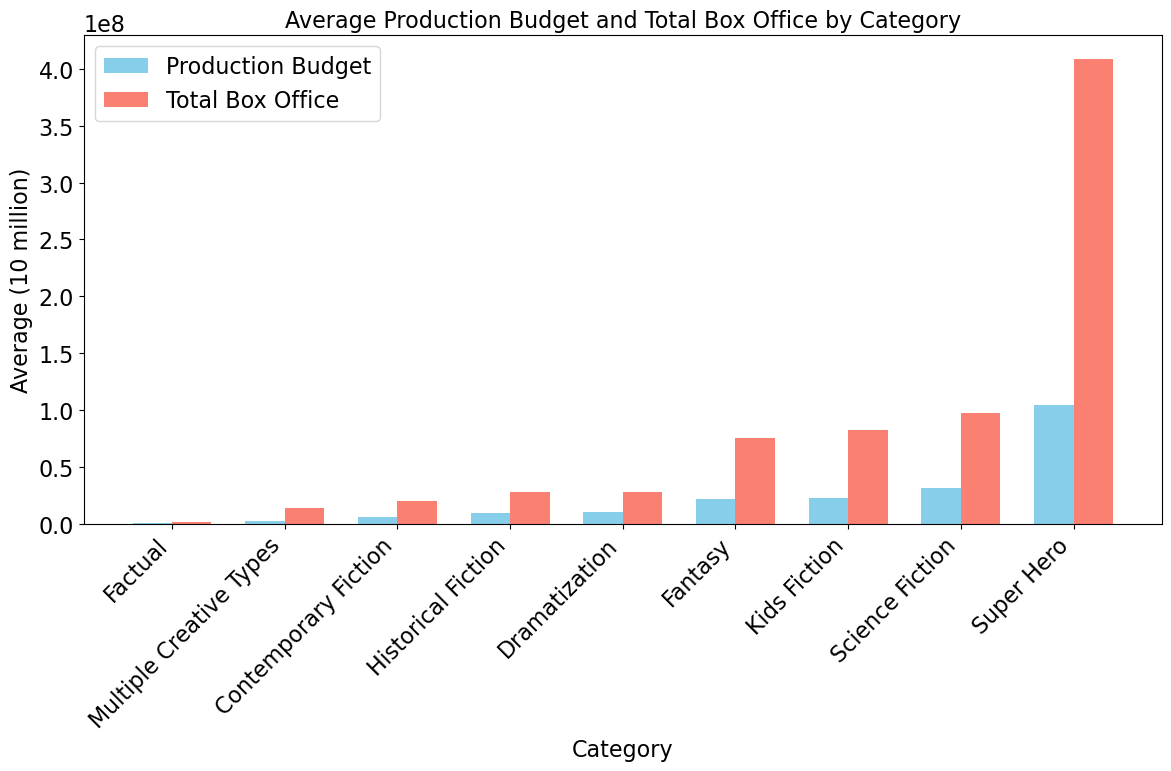

In [11]:
# Calculate average total_box_office and production_budget by category
avg_by_category = df.groupby('creative_type')[['total_box_office', 'production_budget']].mean().reset_index()
avg_by_category = avg_by_category.sort_values('total_box_office')

# Set position for each bar
x = np.arange(len(avg_by_category['creative_type']))
width = 0.35  # width of the bars

plt.figure(figsize=(12, 8))
plt.bar(x - width/2, avg_by_category['production_budget'], width, label='Production Budget', color='skyblue')
plt.bar(x + width/2, avg_by_category['total_box_office'], width, label='Total Box Office', color='salmon')

plt.xticks(x, avg_by_category['creative_type'], rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Average (10 million)')
plt.title('Average Production Budget and Total Box Office by Category')
plt.legend()
plt.tight_layout()
plt.show()

### Source

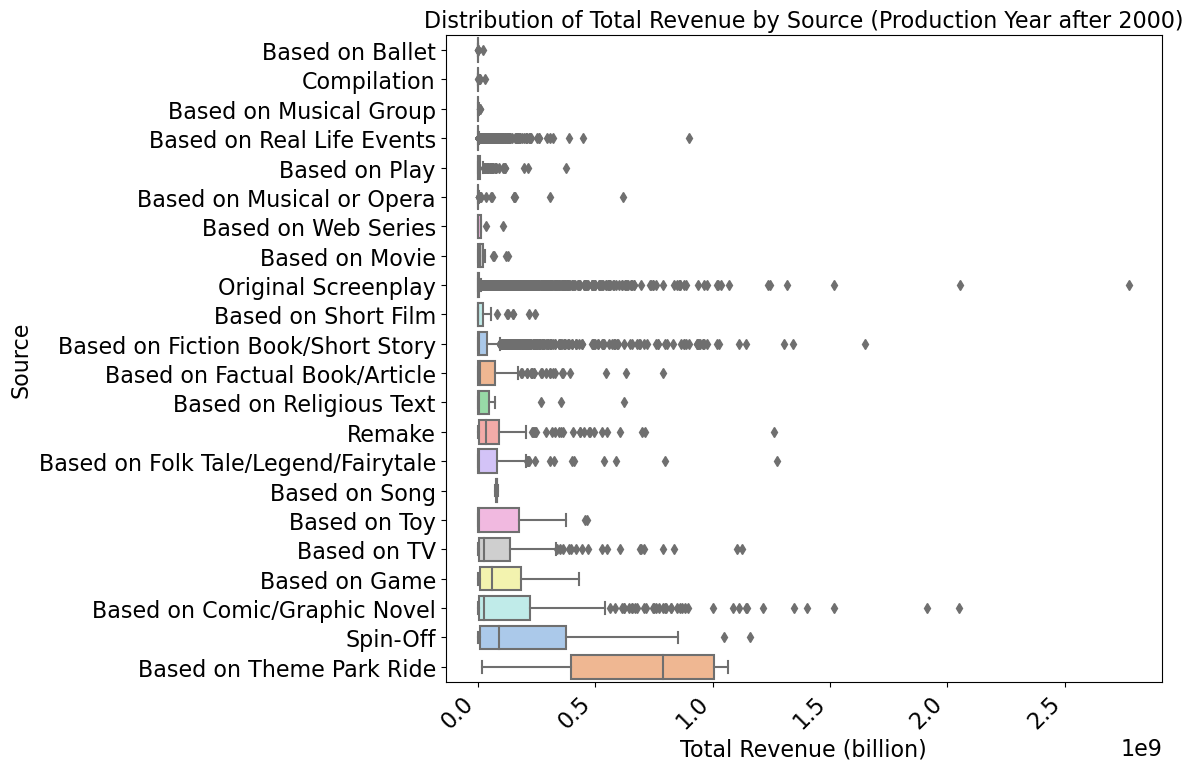

                          count          mean           std     min  \
creative_type                                                         
Contemporary Fiction     9565.0  1.840769e+07  6.013137e+07     0.0   
Dramatization             982.0  2.704829e+07  7.101126e+07     0.0   
Factual                  2908.0  1.602789e+06  1.048478e+07     0.0   
Fantasy                   857.0  7.544305e+07  1.840039e+08     0.0   
Historical Fiction       1453.0  2.428721e+07  7.450994e+07     0.0   
Kids Fiction              841.0  8.050621e+07  1.832622e+08     0.0   
Multiple Creative Types    46.0  1.364848e+07  5.168899e+07  2772.0   
Science Fiction           672.0  9.365631e+07  2.308485e+08     0.0   
Super Hero                107.0  4.245245e+08  4.423094e+08     0.0   

                                 25%          50%           75%           max  
creative_type                                                                  
Contemporary Fiction        31100.00     536012.0  7.48238

In [12]:
# Filter data for movies produced in or after 2000
df_2000 = df[df['production_year'] >= 2000].copy()

df_2000['total_box_office'] = df_2000['domestic_box_office'] + df_2000['international_box_office']

# Box plot of total revenue by category (for movies >= 2000)
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='total_box_office',
    y='source',
    data=df_2000,
    palette='pastel',
    order=df_2000.groupby('source')['total_box_office'].mean().sort_values().index,
    orient='h'
)
plt.title('Distribution of Total Revenue by Source (Production Year after 2000)')
plt.ylabel('Source')
plt.xlabel('Total Revenue (billion)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show descriptive statistics for total revenue by category (for movies >= 2000)
desc_stats = df_2000.groupby('creative_type')['total_box_office'].describe()
print(desc_stats)

### Distributer

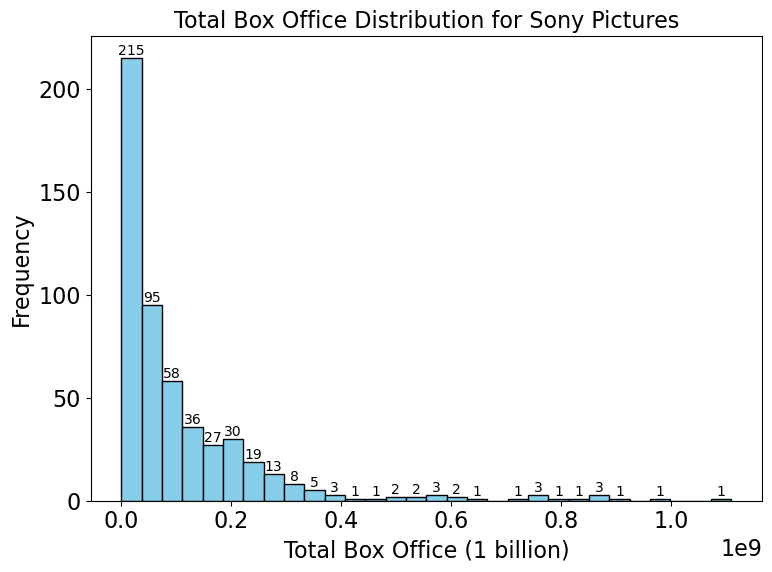

In [17]:
def revenue_distribution_by_distributor(distributor_name):
    # Filter the DataFrame for the specific distributor
    df_dist = df[df['distributor'] == distributor_name]

    # Plot histogram and get the counts and bin edges
    plt.figure(figsize=(8, 6))
    counts, bins, patches = plt.hist(df_dist['total_box_office'], bins=30, color='skyblue', edgecolor='black')

    # Annotate each bar with its count
    for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
        if count > 0:
            plt.text((bin_left + bin_right) / 2, count, int(count), ha='center', va='bottom', fontsize=10)

    plt.title(f'Total Box Office Distribution for {distributor_name}')
    plt.xlabel('Total Box Office (1 billion)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

revenue_distribution_by_distributor('Sony Pictures')

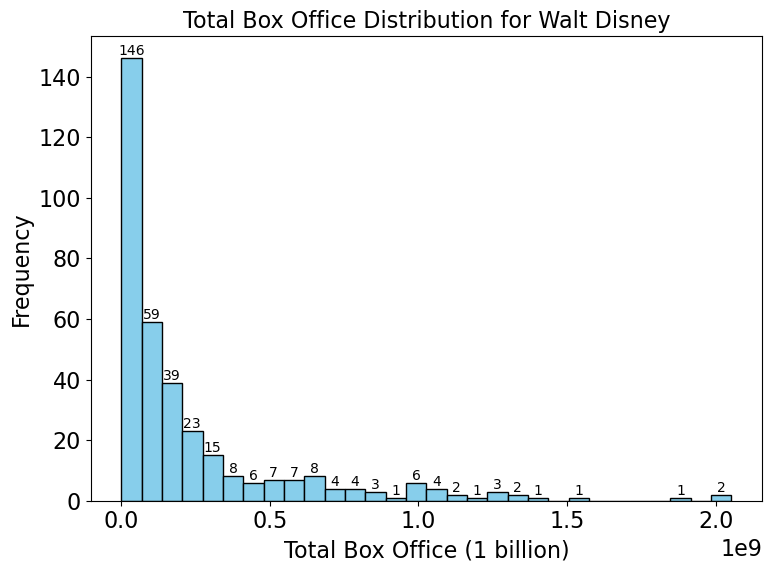

In [18]:
revenue_distribution_by_distributor('Walt Disney')

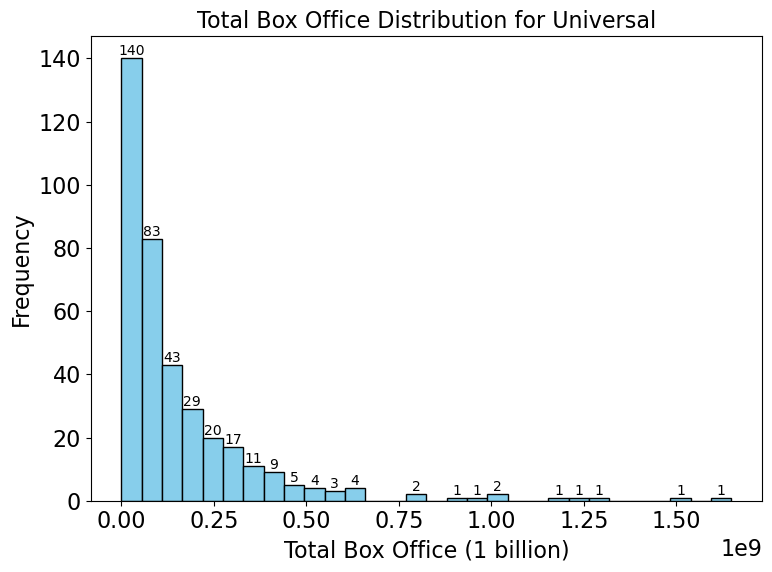

In [19]:
revenue_distribution_by_distributor('Universal')

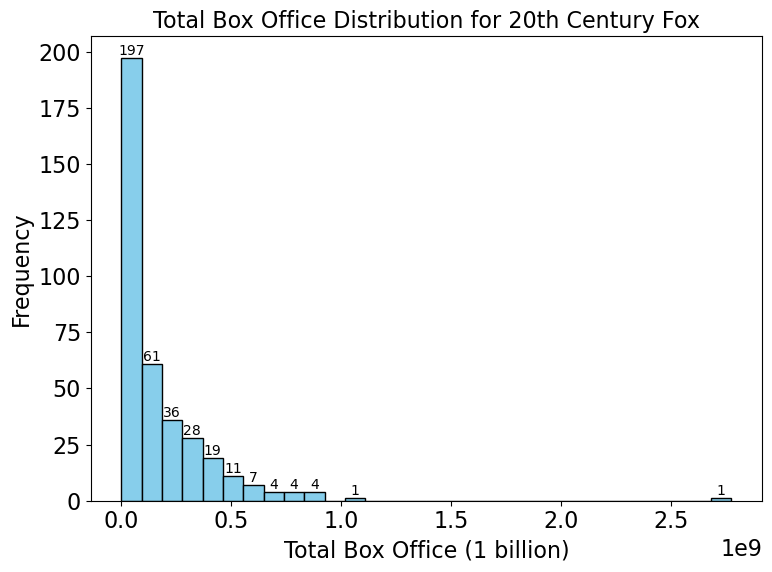

In [20]:
revenue_distribution_by_distributor('20th Century Fox')

#### Distribution and Category

In [16]:
categories = df['creative_type'].unique()

for cat in categories:
    df_cat = df[df['creative_type'] == cat]
    # Top 5 by number of movies
    top_count = df_cat['distributor'].value_counts().head(5)
    # Top 5 by average revenue
    top_avg_revenue = df_cat.groupby('distributor')['total_box_office'].mean().sort_values(ascending=False).head(5)
    
    print(f"\nCategory: {cat}")
    print("Top 5 Distributors by Number of Movies:")
    print(top_count.to_string())
    print("Top 5 Distributors by Average Revenue:")
    print(top_avg_revenue.to_string())


Category: Historical Fiction
Top 5 Distributors by Number of Movies:
Sony Pictures Classics    50
Miramax                   49
Warner Bros.              48
Sony Pictures             46
IFC Films                 40
Top 5 Distributors by Average Revenue:
distributor
Great India Films     2.635029e+08
Paramount Pictures    2.233632e+08
Vestron               2.138938e+08
Dreamworks SKG        2.091434e+08
Walt Disney           1.645797e+08

Category: Super Hero
Top 5 Distributors by Number of Movies:
Walt Disney           19
20th Century Fox      18
Warner Bros.          17
Sony Pictures         13
Paramount Pictures     6
Top 5 Distributors by Average Revenue:
distributor
Walt Disney           9.653166e+08
Sony Pictures         5.601951e+08
Warner Bros.          5.187434e+08
Paramount Pictures    4.594262e+08
20th Century Fox      3.929653e+08

Category: Science Fiction
Top 5 Distributors by Number of Movies:
20th Century Fox      50
Sony Pictures         50
Warner Bros.          47
Univ

### Top 10 Revenue

In [29]:
from tabulate import tabulate

top10 = df.sort_values('total_box_office', ascending=False).head(20).copy()
top10.insert(0, 'Rank', range(1, len(top10) + 1))

print(tabulate(
    top10[['Rank', 'display_name', 'production_year', 'total_box_office', 'distributor']],
    headers='keys',
    tablefmt='plain',
    showindex=False,
    stralign='left',
    numalign='left'
))

Rank    display_name                                   production_year    total_box_office    distributor
1       Avatar                                         2009               2776345279          20th Century Fox
2       Titanic                                        1997               2208208395          Paramount Pictures
3       Star Wars Ep. VII: The Force Awakens           2015               2053311220          Walt Disney
4       Avengers: Infinity War                         2017               2048134200          Walt Disney
5       Avengers: Endgame                              2018               1914531638          Walt Disney
6       Jurassic World                                 2014               1648854864          Universal
7       Furious 7                                      2014               1518722794          Universal
8       The Avengers                                   2011               1517935897          Walt Disney
9       Avengers: Age of Ultron       

### Theater

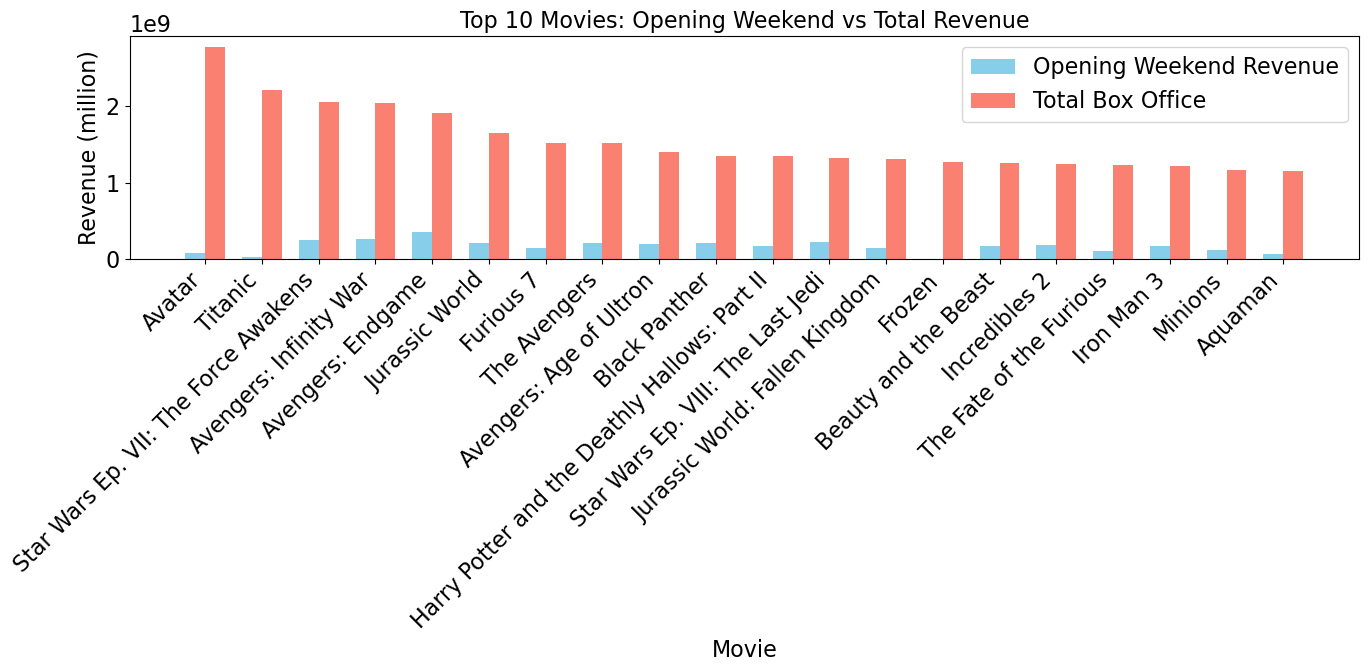

In [32]:
top10_opening_revenue = top10[['display_name', 'opening_weekend_revenue', 'total_box_office']]

# Set position for each bar
x = np.arange(len(top10_opening_revenue['display_name']))
width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x - width/2, top10_opening_revenue['opening_weekend_revenue'], width, label='Opening Weekend Revenue', color='skyblue')
plt.bar(x + width/2, top10_opening_revenue['total_box_office'], width, label='Total Box Office', color='salmon')

plt.xticks(x, top10_opening_revenue['display_name'], rotation=45, ha='right')
plt.xlabel('Movie')
plt.ylabel('Revenue (million)')
plt.title('Top 10 Movies: Opening Weekend vs Total Revenue')
plt.legend()
plt.tight_layout()
plt.show()

### Sequel